<div style="font-size:18pt; padding-top:20px; text-align:center">ЗАДАНИЕ. <b>K-Means кластеризация</b></div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin.study@yandex.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Содержание</span>
    <ol>
        <li><a href="#1">Варианты</a></li>
        <li><a href="#2">Задание</a></li>
    </ol>
</div>

Подключение стилей оформления

In [1]:
%%html
<link href="css/style.css" rel="stylesheet" type="text/css">

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. Варианты</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p>Чтобы узнать свой вариант, введите Вашу фамилию в соответвующее поле ниже и запустите ячейку:</p>

In [2]:
surname = "Ефимов" #Ваша фамилия

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [1, 42, 21, 21, 34,  6, 44, 26, 18, 44, 38, 26, 14, 43,  4, 49, 45,
        7, 42, 29,  4,  9, 36, 34, 31, 29,  5, 30,  4, 19, 28, 25, 33]

d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 1 + 1
print("Ваш вариант - ", variant)

Ваш вариант -  1


<div class="msg-block msg-warning">
  <p class="msg-text-warn">Варианты могут не совпадать с предыдущими ДЗ</p>
</div>

In [231]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_score
%matplotlib inline

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">2. Задание</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p><b>Задание 1</b></p>

<ol>
    <li>Загрузить исходные данные - файл <b>"Cluster_A8_T1.csv"</b></li>
    <li>Построить графики X1-X2, X1-X3, X2-X3</li>
    <li>Построить графики X1-X2-Y, X1-X3-Y, X2-X3-Y (Y - реальные кластеры)</li>
    <li>Произвести кластеризацию методом KMean и построить два графика NInit-ARS для init=Random и init=K-Means++, где
<br><b>NInit</b> - количество повторений выполнения алгоритма кластеризации - от 1 до 40, 
<br><b>ARS</b> (adjusted_rand_score) - ошибка кластеризации, 
<br><b>параметры KMean</b>: n_clusters=5, max_iter=300, init="random", n_init=i</li>
    <li>Повторить шаг 4 несколько раз</li>
    <li>Сделать выводы по полученным результатам</li>
</ol>

In [232]:
df = pd.read_csv("data/Cluster_A8_T1.csv")
x1 = df.X1.values
x2 = df.X2.values
x3 = df.X3.values
y = df.Y.values

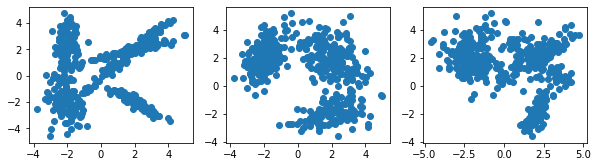

In [233]:
plt.figure(figsize=[10,2.5])

plt.subplot(1,3,1)
plt.scatter(x1, x2)

plt.subplot(1,3,2)
plt.scatter(x1, x3)

plt.subplot(1,3,3)
plt.scatter(x2, x3)

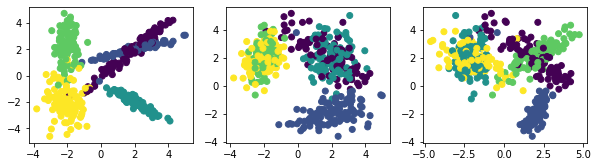

In [234]:
plt.figure(figsize=[10,2.5])

plt.subplot(1,3,1)
plt.scatter(x1, x2, c=y)

plt.subplot(1,3,2)
plt.scatter(x1, x3, c=y)

plt.subplot(1,3,3)
plt.scatter(x2, x3, c=y)

In [235]:
dfFit = df[['X1', 'X2', 'X3']]

In [236]:
randomARS = []
kmeansPPARS = []
for i in range(0,4):
    tempRandomARS = []
    tempKmeansPPARS = []
    for j in range(1, 41):
        kmeansRandom = KMeans(n_clusters=5, max_iter=300, init="random", n_init=j).fit(dfFit)
        tempRandomARS.append(adjusted_rand_score(kmeansRandom.predict(dfFit), y))
        
        kmeansKMPP = KMeans(n_clusters=5, max_iter=300, n_init=j).fit(dfFit)
        tempKmeansPPARS.append(adjusted_rand_score(kmeansKMPP.predict(dfFit), y))
    randomARS.append(tempRandomARS)
    kmeansPPARS.append(tempKmeansPPARS)

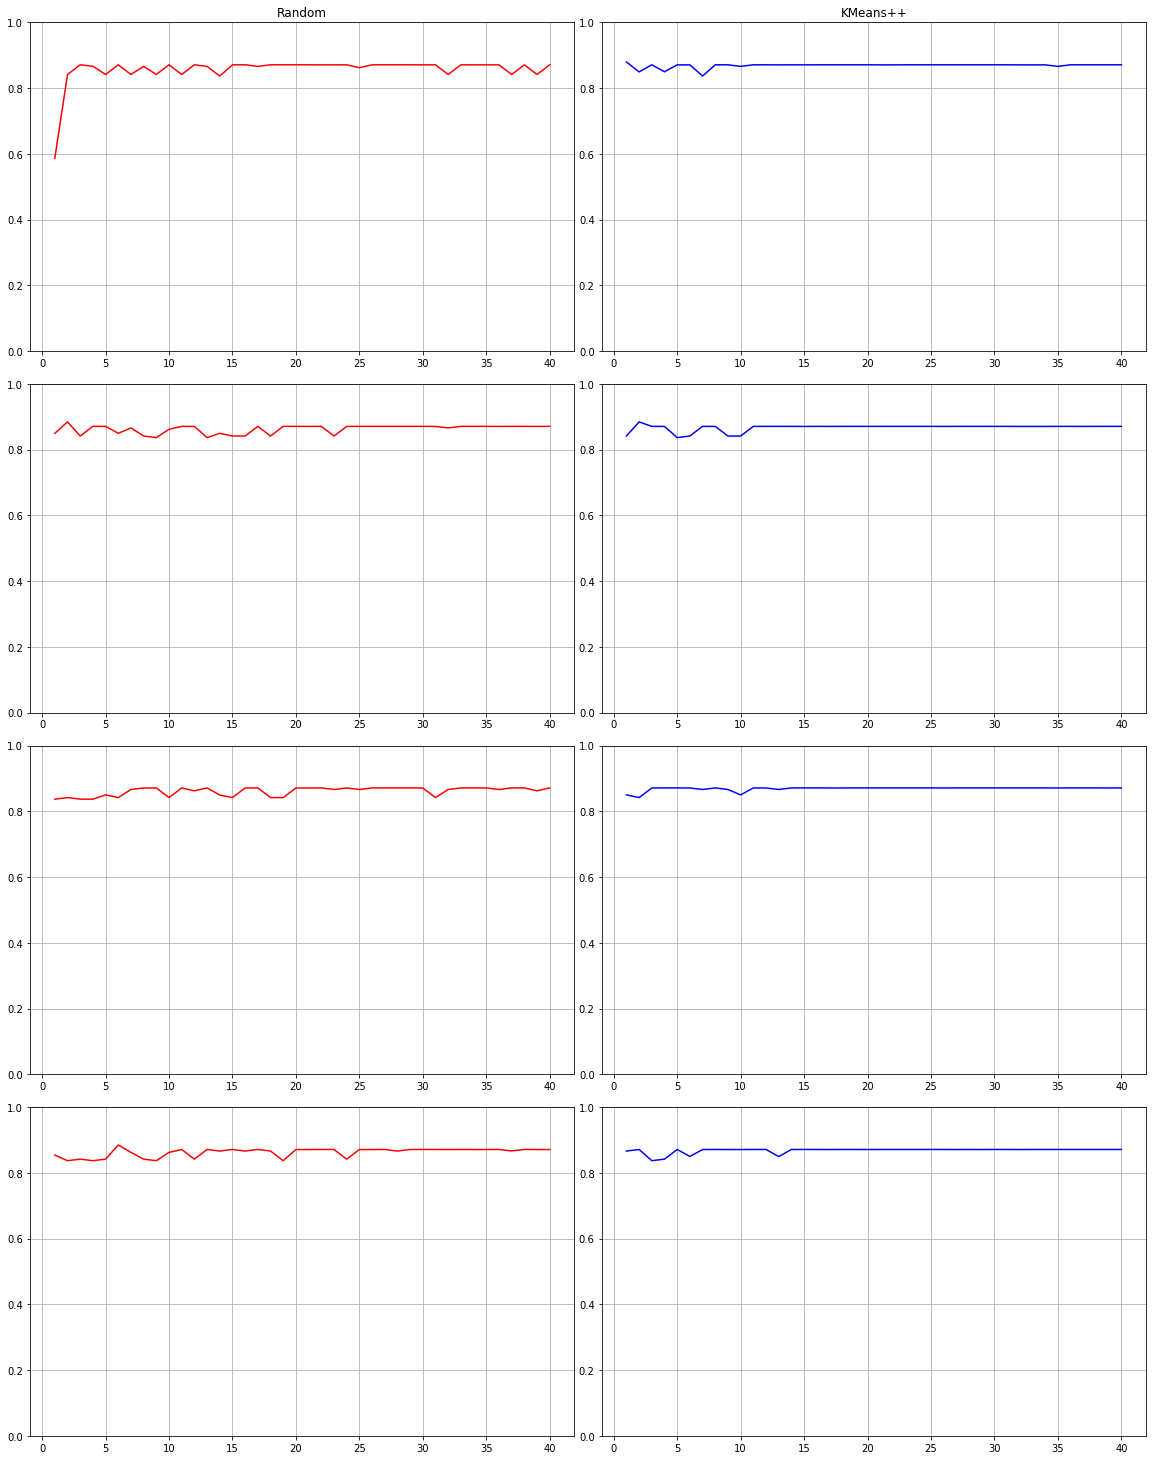

In [240]:
plt.figure(figsize=[20, 26])
plt.subplot(4,2,1, ymargin=10)
plt.title("Random")
plt.plot(range(1,41), randomARS[0], "r-", scaley=False)
plt.grid()

plt.subplot(4,2,2, ymargin=1)
plt.title("KMeans++")
plt.plot(range(1,41), kmeansPPARS[0], "b-", scaley=False)
plt.grid()

plt.subplot(4,2,3, ymargin=1)
plt.plot(range(1,41), randomARS[1], "r-", scaley=False)
plt.grid()

plt.subplot(4,2,4, ymargin=1)
plt.plot(range(1,41), kmeansPPARS[1], "b-", scaley=False)
plt.grid()

plt.subplot(4,2,5, ymargin=1)
plt.plot(range(1,41), randomARS[2], "r-", scaley=False)
plt.grid()

plt.subplot(4,2,6, ymargin=1)
plt.plot(range(1,41), kmeansPPARS[2], "b-", scaley=False)
plt.grid()

plt.subplot(4,2,7, ymargin=1)
plt.plot(range(1,41), randomARS[3], "r-", scaley=False)
plt.grid()

plt.subplot(4,2,8, ymargin=1)
plt.plot(range(1,41), kmeansPPARS[3], "b-", scaley=False)
plt.grid()

plt.subplots_adjust(wspace=0.05, hspace=0.1)

<b>Вывод:</b><br>
На данных графиках мы можем наблюдать тенденцию, что в случае со способом обучения <i>Random</i>, увеличение количества итераций алгоритма мало влияет на качество обучения, поскольку сколько не генерируй случайные значения, а с некоторой вероятностью всё равно могут не попасться оптимальные начальные точки кластеров.
В случае же с методом <i>KMeans++</i> при увеличении количества итераций в 100% случаев наблюдалось улучшение качества кластеризации.

<p><b>Задание 2</b></p>

<ol>
    <li>Загрузить исходные данные - файл <b>"Cluster_A8_T2.csv"</b></li>
    <li>Построить графики X1-X2, X1-X3, X2-X3</li>
    <li>Произвести кластеризацию методом KMean и построить график NCluster-Inertia, где
<br><b>NCluster</b> - количество кластеров,
<br><b>Inertia</b> - сумма расстояний наблюдений до их ближайших центров кластеров,
<br><b>Параметры</b> KMean: n_clusters=i, max_iter=300, init="k-means++", random_state=0, n_init=20</li>
    <li>Выбрать подходящее количество кластеров</li>
    <li>Построить граифики X1-X2, X1-X3, X2-X3 и X1-X2-Y_pred, X1-X3-Y_pred, X2-X3-Y_pred (Y_pred - предсказанные кластеры)</li>
</ol>

In [133]:
df = pd.read_csv("data/Cluster_A8_T2.csv")
x1 = df.X1.values
x2 = df.X2.values
x3 = df.X3.values

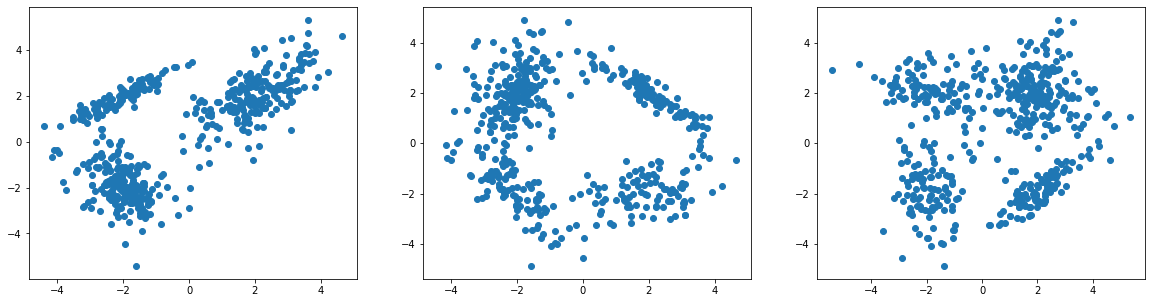

In [207]:
%matplotlib inline
plt.figure(figsize=[20, 5])

plt.subplot(1,3,1)
plt.scatter(x1, x2)

plt.subplot(1,3,2)
plt.scatter(x1, x3)

plt.subplot(1,3,3)
plt.scatter(x2, x3)
plt.show()

In [208]:
inertia = []
silhouette = []
Is = range(2,11)
for i in Is:
    kmeans = KMeans(n_clusters=i, max_iter=300, init="k-means++", random_state=0, n_init=20).fit(df)
    inertia.append(kmeans.inertia_)
#     print(" --------------------------------- \n", kmeans.labels_)
    silhouette.append(silhouette_score(df, kmeans.labels_))

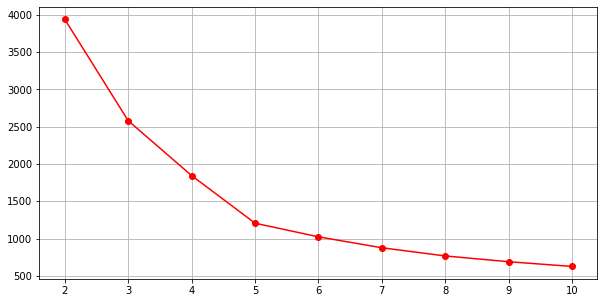

In [210]:
plt.figure(figsize=[10,5])
plt.plot(Is, inertia, "r-o")
plt.grid()

По графику методом <i>"Локтя"</i> мы можем предположить, что оптимальное количество кластеров - 5.

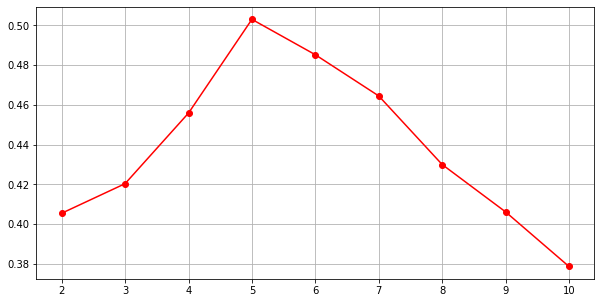

In [211]:
plt.figure(figsize=[10,5])
plt.plot(Is, silhouette, "r-o")
plt.grid()

Воспользовавшись метрикой <i>"Силует"</i> нам удалось более наглядно убедиться в том, что оптимальное количество кластеров для данной выборки - 5

In [192]:
# Тут решил не запариваться с определением этого параметра по формуле, а просто захардкодить
n_clusters = 5

In [193]:
best_kmeans = KMeans(n_clusters=n_clusters, max_iter=300, init="k-means++", random_state=0, n_init=20).fit(df)
y_pred = best_kmeans.predict(df)

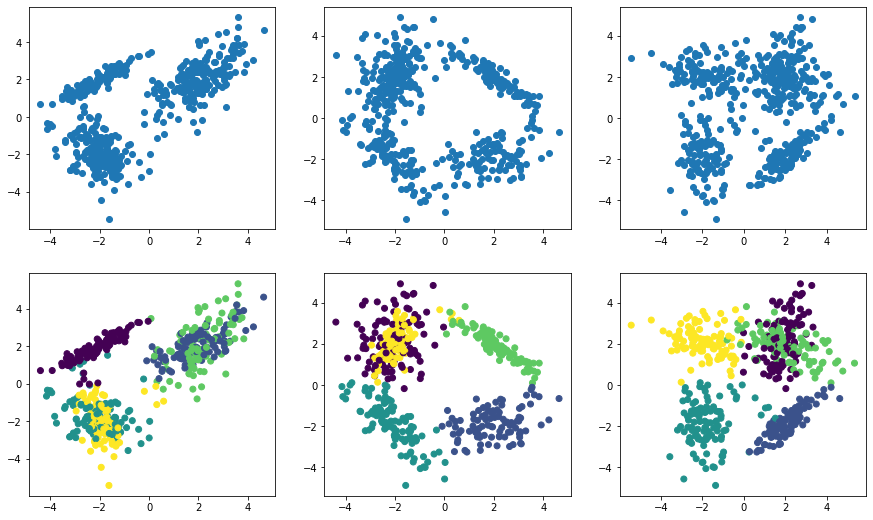

In [203]:
plt.figure(figsize=[15,9])

plt.subplot(2,3,1)
plt.scatter(x1, x2)

plt.subplot(2,3,2)
plt.scatter(x1, x3)

plt.subplot(2,3,3)
plt.scatter(x2, x3)

plt.subplot(2,3,4)
plt.scatter(x1, x2, c=y_pred)

plt.subplot(2,3,5)
plt.scatter(x1, x3, c=y_pred)

plt.subplot(2,3,6)
plt.scatter(x2, x3, c=y_pred)